<a href="https://colab.research.google.com/github/Karimi-Gichunge/K-NN-and-Naive-Bayes-Classifiers/blob/main/Moringa_School_K_Nearest_Neighbours__IP_Week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Titanic Survival Prediction 

## 1. Defining the Question

### a) Specifying the Data Analytic Question

> Predict survival rate based on given features in the titanic ship.

### b) Defining the Metric for Success

The project will be a success if we are able to create a model that will accurately determine whether or not a passenger survives or not given their specific features in the titanic ship. We will use accuracy score, confusion matrix and classification report as the metrics for testing perfomance of our models.

### c) Understanding the context 

The RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after it collided with an iceberg during its maiden voyage from Southampton to New York City. This unfortunate incident resulted in the death of 1502 out of 2224 passengers and crew.
While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. In this analysis we will explore the data to understand which group of people had a better chance at surviving and then later build a model to predict what sorts of people were more likely to survive using passenger data (ie name, age, gender, socio-economic class, etc).


### d) Data Relevance

The data provided is split into:

1.   Train set
2.   Test set

The Train dataset contains our target variable,survived and features, i.e passenger data. The Test set contains passenger information only. 
We will use training set  to build our K-NN models. 
We will use the Test set to see how well your model performs on unseen data.

Definition of variables:
 Survived: 0 = No, 1 = Yes
 
 pclass: Ticket class1 = 1st, 2 = 2nd, 3 = 3rd
 
 sex: Gender
 
 Age: Age in years

 sibsp: # of siblings / spouses aboard the Titanic
 
 parch: # of parents / children aboard the Titanic
 
 ticket: Ticket number

 fare: Passenger fare

 cabin: Cabin number

 embarked: Port of Embarkation
 C = Cherbourg, Q = Queenstown, S = Southampton

 Variable Notes:

pclass: A proxy for socio-economic status (SES)
* 1st = Upper
* 2nd = Middle
* 3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5

sibsp: The dataset defines family relations in this way…
* Sibling = brother, sister, stepbrother, stepsister
* Spouse = husband, wife (mistresses and fiancés were ignored)



parch: The dataset defines family relations in this way…
* Parent = mother, father
* Child = daughter, son, stepdaughter, stepson
* Some children travelled only with a nanny, therefore parch=0 for them.



## 2. Reading the Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Loading the Data 
test = pd.read_csv("/content/test (1).csv")
train = pd.read_csv("/content/train (5).csv")



## 3. Checking the Data

In [3]:
# Determining the no. of records in our dataset
#train.shape, test.shape

print("Size of training set: ", train.shape)
print('\n')

print("Size of testing set: ", test.shape)


Size of training set:  (891, 12)


Size of testing set:  (418, 11)


In [4]:
# Previewing the top of our dataset
#
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Previewing the bottom of our dataset
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Checking whether each column has an appropriate datatype
#
print("=== Train Set ===")
print(train.dtypes)
print('\n')
print("=== Test Set ===")
print(test.dtypes)

=== Train Set ===
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


=== Test Set ===
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## 4. Tidying the Dataset

In [8]:
# Identifying the Missing Data
print("=== Train Set ===")
print(train.isnull().sum())
print('\n')
print("=== Test Set ===")
print(test.isnull().sum())

=== Train Set ===
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


=== Test Set ===
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Since the column cabin has over 70% missing values in both datasets, we drop it. We will fill in the embarked column with the embarking station that most common. We will also fill the column age with median

In [9]:
#Dealing with missing values
#For train set
train['Age'].fillna(value=train['Age'].median(), inplace=True)
train = train[train['Embarked'].notna()]
train = train.drop(['Cabin'], axis = 1) 
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
#For test set
test['Age'].fillna(value=test['Age'].median(), inplace=True)
test = test.drop(['Cabin'], axis = 1) 
test = test[test['Fare'].notna()]
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

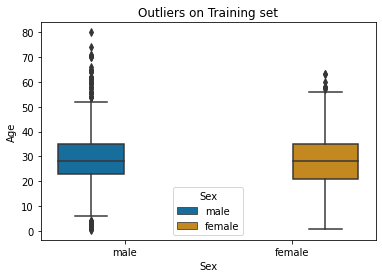

Text(0.5, 1.0, 'Outliers on Test set')

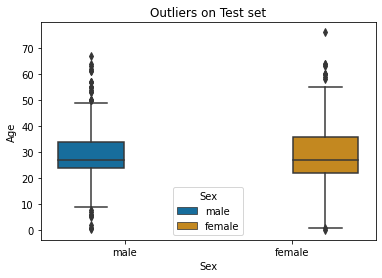

In [11]:
#Checking for outliers 
#The column age
sns.boxplot(y='Age', x='Sex', 
                 data=train, 
                 palette="colorblind",
                 hue='Sex')
plt.title("Outliers on Training set")
plt.show()
sns.boxplot(y='Age', x='Sex', 
                 data=test, 
                 palette="colorblind",
                 hue='Sex')
plt.title("Outliers on Test set")

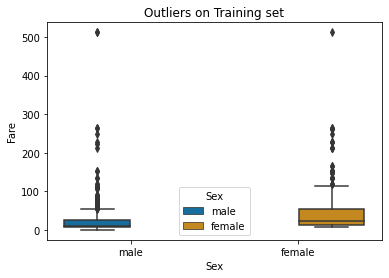

Text(0.5, 1.0, 'Outliers on Test set')

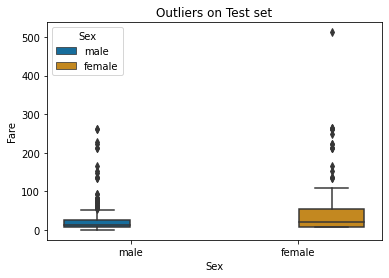

In [12]:
#Checking for outliers in the fare column
#Checking for outliers 
#The column age
sns.boxplot(y='Fare', x='Sex', 
                 data=train, 
                 palette="colorblind",
                 hue='Sex')
plt.title("Outliers on Training set")
plt.show()
sns.boxplot(y='Fare', x='Sex', 
                 data=test, 
                 palette="colorblind",
                 hue='Sex')
plt.title("Outliers on Test set")

Our fare column has alot of outliers mainly because fare is paid according to the ticket class and distance to be travelled, for example Class 1 paid the highest and those travelling longer distances also paid more. Hence the reason for the outliers in this column. We cannot remove them because if we do we risk losing alot of information. We will remove the extreme outlier where fare is 500

For age we will leave it as it is because the outliers might help us classify survival.  

Since we are using K-NN Classifier in this study which is highly sensitive to outliers we will standardize our data later to bring the data points to a closer range. This way we will ensure that the outliers don't affect the classifier. 

In [13]:
outl = train[(train.Fare >= 400)]
outl

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


In [14]:
outl2 = test[(test.Fare >= 400)]
outl2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
343,1235,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,C


Looks like the outlier data point is for one family since they share the same ticket number, paid the same amount and also embarked from Cherbourg. Good thing, they all survived. We will remove them since they were on the extreme.

In [15]:
#Removing the extreme outlier
train1 = train[train['Fare'] <= 400 ]
test1 = test[test['Fare'] <= 400 ]
print("Size of training set: ", train1.shape)
print('\n')
print("Size of testing set: ", test1.shape)

Size of training set:  (886, 11)


Size of testing set:  (416, 10)


In [16]:
# Checking for Anomalies
#Checking for unique values in all columns
for column in train1.columns:
  print(column)

  print(train1[column].unique())
  print('\n')

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 24

In [17]:
train1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [18]:
#Removing columns that won't be necessary in this study
train_set = train1.drop(['PassengerId','Name', 'Ticket'], axis = 1) 
test_set = test1.drop(['PassengerId','Name', 'Ticket'], axis = 1)

print("=== Train Set ===")
print(train_set.columns)
print('\n')
print("=== Test Set ===")
print(test_set.columns)

=== Train Set ===
Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


=== Test Set ===
Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')


In [19]:
train_set.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

## 5. Exploratory Analysis

In [20]:
train_set.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [21]:
import plotly.express as px
fig = px.histogram(train_set, x="Survived", y="Sex", color="Survived", width=600)
fig.show()
#A total of 549 individuals didnot survive whereas 337 of them survived
#It's important to also note that our training set is imbalanced

In [22]:
freq = train_set.groupby(['Survived'] )['Sex'].value_counts().unstack(1)
freq
#A greater number of females survived as compared to men

Sex,female,male
Survived,,
0,81,468
1,230,107


In [23]:
import plotly.express as px
fig = px.histogram(train_set, x="Sex", y="Survived", color="Sex", width=600)
fig.show()
#From the training set, there were 575 males and 311 females aboard the titanic

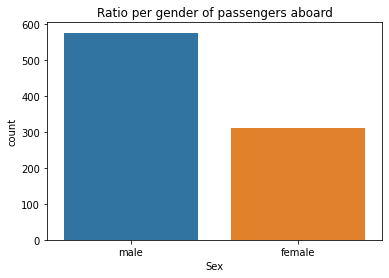

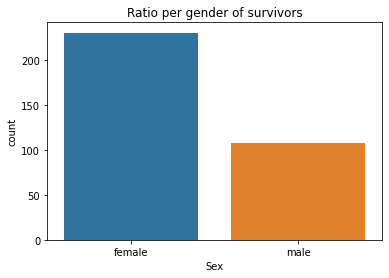

In [24]:
#Ratio of passengers per gender aboard the titanic vs ratio of survivors
sns.countplot(train_set.Sex)
plt.title("Ratio per gender of passengers aboard")
plt.show()
df = train_set[(train_set.Survived == 1)]
sns.countplot(df.Sex)
plt.title("Ratio per gender of survivors")
plt.show()


There were more males aboard the titanic as compared to females but more females survived as compared to men

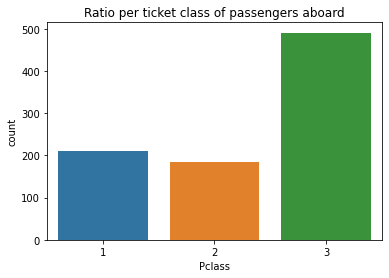

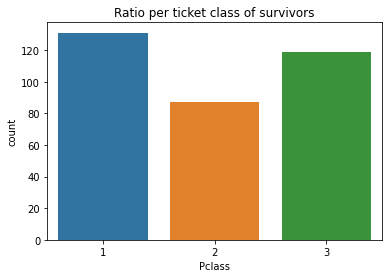

In [25]:
#Surviving per ticket class
sns.countplot(train_set.Pclass)
plt.title("Ratio per ticket class of passengers aboard")
plt.show()
#df = train_set[(train_set.Survived == 1)]
sns.countplot(df.Pclass)
plt.title("Ratio per ticket class of survivors")
plt.show()

Ticket class 3 had the greatest number of passengers aboard with around 500 passengers, class 2 had the lowest at around 190 and class 1 had around 220 passengers. 

Around 140 passengers from the 220 in 1st class survived, but only 110 out of the 500 in 3rd class survived and only 90 from the 190 in 2nd class survived.

Most people who didn't survive were from 3rd class.

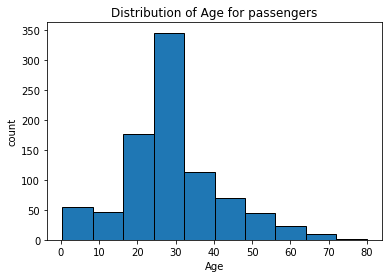

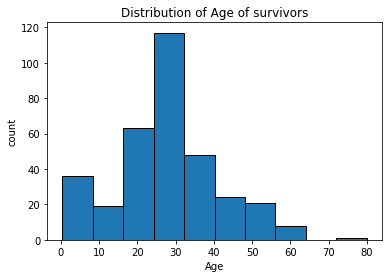

In [33]:
plt.hist(train_set.Age, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Distribution of Age for passengers')
plt.show()
plt.hist(df.Age, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('count')
plt.title('Distribution of Age of survivors')
plt.show()

The highest number of passengers fell in the age group 17 to 32. This age group also had the highest number of passengers who survived. Also kids from the age of 0 to 9 mostly survived. 

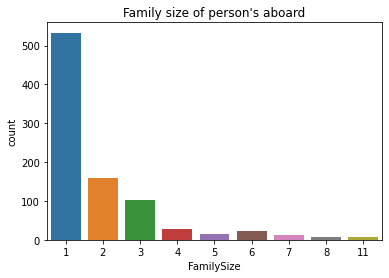

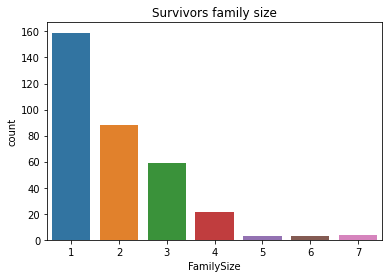

In [39]:
#Check whether people with family on board survived more as compared to those travelling alone
data = train_set.copy()
data['FamilySize'] = data.SibSp + data.Parch + 1
df1 = data[(data.Survived == 1)]

sns.countplot(data.FamilySize)
plt.title("Family size of person's aboard")
plt.show()
#df = train_set[(train_set.Survived == 1)]
sns.countplot(df1.FamilySize)
plt.title("Survivors family size")
plt.show()


Most of the passengers travelled without family members, i.e no siblings, parent, spouse or child on board with them. Also, most survivors travelled solo, but there was a greater chance of survival for family's between 2 and 4. Person's with a family size of above 7 did not survive

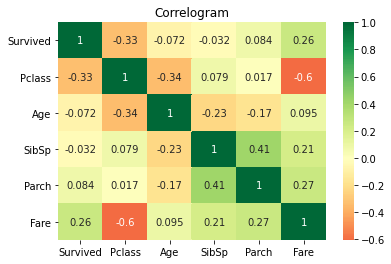

In [41]:
#Correlation matrix
corr = train_set.corr()
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram')
plt.show()

Our features are not correlated with each other unless for Fare and Pclass which have a negative relationship

## 6. Implementing the Solution

### a. Feature Engineering

**Label Encoding**

Sex: male = 1 and female = 0

Embarked: S = 2, Q = 1 and C = 0

In [46]:
#Encoding using label encoder
from sklearn.preprocessing import LabelEncoder

train_data = train_set.apply(LabelEncoder().fit_transform)
train_data.head()
test_data = test_set.apply(LabelEncoder().fit_transform)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,1,44,0,0,24,1
1,2,0,60,1,0,5,2
2,1,1,72,0,0,41,1
3,2,1,34,0,0,34,2
4,2,0,27,1,1,46,2


### b.**Dealing with imbalanced data** 

For this study we will not deal with imbalancein our training dataset for fear of losing important information when undersampling or overfishing when oversampling. Instead, we will change our perfomance metrics. Since accuracy score can not be trusted when dealing with imbalanced data, we will try not to focus on it. We will mainly focus on classification report and thr confusion matrix

### c. **Scaling our datasets/ Splitting datasets**

For K-NN algorithm it is very important for all data points to be in the same range, ewe will therefore scale our training set. We will first separate features from target.

We will then split our training set, into training and testing set since our given testing set has no label. We will later use this test set 

In [52]:
#Separate features from target
X = train_data.iloc[:, 1:8].values
y = train_data.iloc[:, 0].values
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train using 80% of the data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape

((708, 7), (708,))

### **d. Modelling**

We will use K-NN algorithm

**With defaults**

In [55]:
from sklearn.neighbors import KNeighborsClassifier
#Create KNN Object.
knn = KNeighborsClassifier()

#Training the model.
model = knn.fit(X_train, y_train)

#Predict test data set.
y_pred = model.predict(X_test)

#Checking performance our model with confusion matrix.
from sklearn.metrics import confusion_matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))
print('\n')

#Checking performance our model with classification report.
from sklearn.metrics import classification_report
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score
print('\n')
print("=== ROC Score ===")
roc_auc_score(y_test, y_pred)


=== Confusion Matrix ===
[[95 17]
 [18 48]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       112
           1       0.74      0.73      0.73        66

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



=== ROC Score ===


0.7877435064935066

We have a ROC_AUC Score of 78.77%, meaning that our model is able to predict 0s as not survived and 1s as survived upto a 78.77%. Also from the confusion matrix we see that our model doesn't perform so well, it predicts 18 passengers who actually survived as not survived and 17 who did not survive as survived.. We will thus, tune hyperparameters to improve our model perfomance.

## 7. Challenging the solution

**Hyperparameter tuning**

In [60]:
from sklearn.model_selection import GridSearchCV
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2,3]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
model_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(model_2, hyperparameters, cv=10)
#Fit the model
best_model = clf.fit(X,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 14


In [59]:
knn_2 = KNeighborsClassifier(leaf_size=1, n_neighbors=14, p=1)

#Training the model.
model_2 = knn_2.fit(X_train, y_train)

#Predict test data set.
y2_pred = model.predict(X_test)

#Checking performance our model with confusion matrix.
from sklearn.metrics import confusion_matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, y2_pred))
print('\n')

#Checking performance our model with classification report.
from sklearn.metrics import classification_report
print("=== Classification Report ===")
print(classification_report(y_test, y2_pred))

#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score
print('\n')
print("=== ROC Score ===")
roc_auc_score(y_test, y2_pred)


=== Confusion Matrix ===
[[95 17]
 [18 48]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       112
           1       0.74      0.73      0.73        66

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178



=== ROC Score ===


0.7877435064935066

After hyperparameter tuning, our model performance has slightly improved though we still have alot of misclassifications.

Using the best parameters above, we will split our data with different ratios to check model perfomance

**70-30 Ratio**

In [62]:
# Train using 70% of the data.
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=0)
X1_train.shape, y1_train.shape

((620, 7), (620,))

In [63]:
knn_3 = KNeighborsClassifier(leaf_size=1, n_neighbors=14, p=1)

#Training the model.
model_3 = knn_3.fit(X1_train, y1_train)

#Predict test data set.
y3_pred = model.predict(X1_test)

#Checking performance our model with confusion matrix.
from sklearn.metrics import confusion_matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y1_test, y3_pred))
print('\n')

#Checking performance our model with classification report.
from sklearn.metrics import classification_report
print("=== Classification Report ===")
print(classification_report(y1_test, y3_pred))

#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score
print('\n')
print("=== ROC Score ===")
roc_auc_score(y1_test, y3_pred)

=== Confusion Matrix ===
[[148  20]
 [ 24  74]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       168
           1       0.79      0.76      0.77        98

    accuracy                           0.83       266
   macro avg       0.82      0.82      0.82       266
weighted avg       0.83      0.83      0.83       266



=== ROC Score ===


0.8180272108843537

Compared to the model with a ratio of 80-20, the one with 70-30 has a higher ROC Score and less misclassifications in the Confusion matrix.

**60-40 Ratio**

In [64]:
# Train using 60% of the data.
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.4, random_state=0)
X2_train.shape, y2_train.shape

((531, 7), (531,))

In [65]:
knn_4 = KNeighborsClassifier(leaf_size=1, n_neighbors=14, p=1)

#Training the model.
model_4 = knn_4.fit(X2_train, y2_train)

#Predict test data set.
y4_pred = model.predict(X2_test)

#Checking performance our model with confusion matrix.
from sklearn.metrics import confusion_matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y2_test, y4_pred))
print('\n')

#Checking performance our model with classification report.
from sklearn.metrics import classification_report
print("=== Classification Report ===")
print(classification_report(y2_test, y4_pred))

#Checking performance our model with ROC Score.
from sklearn.metrics import roc_auc_score
print('\n')
print("=== ROC Score ===")
roc_auc_score(y2_test, y4_pred)

=== Confusion Matrix ===
[[205  23]
 [ 31  96]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       228
           1       0.81      0.76      0.78       127

    accuracy                           0.85       355
   macro avg       0.84      0.83      0.83       355
weighted avg       0.85      0.85      0.85       355



=== ROC Score ===


0.8275141594142837

Model has improved to 82.75% after splitting data with a ratio of 60-40

## 8. Conclusion



The model that best classifies passengers who survived from those who didn't is when hyperparameters are tuned as follows: 

* Best leaf_size: 1
* Best p: 1
* Best n_neighbors: 14

and with a 60-40 split. 

Also, data needs to be scaled